# Worksheet 5 -- Generative models 1
# Text Classification using multinomial Naive Bayes
## Orysya Stus
## 2.5.2017

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
!pwd
!ls

/home/orysya/Desktop/DSE210/Wksht5_Generative_models
20news-bydate	    20news-bydate-train  vocabulary.txt
20news-bydate-test  concat_docs		 Worksheet5.ipynb


## For a refresher on Native Bayes review:
https://www.youtube.com/watch?v=km2LoOpdB3A
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

## Part (a)
For this problem, you’ll be using the 20 Newsgroups data set. There are several versions of it on the web. You should download “20news-bydate.tar.gz” from

http://qwone.com/~jason/20Newsgroups/

Unpack it and look through the directories at some of the files. Overall, there are roughly 19,000 documents, each from one of 20 newsgroups. The label of a document is the identity of its newsgroup. The documents are divided into a training set and a test set.

### Examine the contents of 1 text document. Note: document sizes vary (normalize as needed)

In [3]:
!cat ./20news-bydate-train/alt.atheism/51124

From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)
Subject: Re: An Anecdote about Islam
Organization: Technical University Braunschweig, Germany
Lines: 28

In article <114127@bu.edu>
jaeger@buphy.bu.edu (Gregg Jaeger) writes:
 
>>When they are victimized they are Muslims. When they victimize others
>>they are not True Muslims (tm) or no Muslims at all.
>
>>Quite annoying.
>
>I don't understand the point of this petty sarcasm. It is a basic
>principle of Islam that if one is born muslim or one says "I testify
>that there is no god but God and Mohammad is a prophet of God" that,
>so long as one does not explicitly reject Islam by word then one _must_
>be considered muslim by all muslims. So the phenomenon you're attempting
>to make into a general rule or psychology is a direct odds with basic
>Islamic principles. If you want to attack Islam you could do better than
>than to argue against something that Islam explicitly contradicts.
>
 
It was no criticism of Islam for a change, it was 

### Loading the text file datasets into sklearn

In [4]:
train = sklearn.datasets.load_files('./20news-bydate-train/', load_content=True, encoding='utf-8', decode_error='ignore')
test = sklearn.datasets.load_files('./20news-bydate-test/', load_content=True, encoding='utf-8', decode_error='ignore')

## Part (b)
The same website has a processed version of the data, “20news-bydate-matlab.tgz”, that is par-
ticularly convenient to use. Download this and also the file “vocabulary.txt”. Look at the first

training document in the processed set and the corresponding original text document to under-
stand the relation between the two.

### Create vocabulary, class category, and document dictionaries to be used.

In [5]:
vocab = {}
reverse_vocab = {}
count = 0
a = open('./vocabulary.txt', 'r')
for v in a:
    val = v.strip()
    vocab[val] = count
    reverse_vocab[count] = val
    count += 1  

In [6]:
categories = {}
for i,e in enumerate(test.target_names):
    categories[i] = e

In [7]:
test_map = dict(enumerate(test.filenames))
reverse_test_map = {v:k for k,v in test_map.items()}

## Part (c)
The words in the documents constitute an overall vocabulary V of size 61188. Build a multinomial

Naive Bayes model using the training data. For each of the 20 classes j = 1, 2, . . . , 20, you must

have the following:

• πj , the fraction of documents that belong to that class; and

• Pj , a probability distribution over V that models the documents of that class.

In order to fit Pj , imagine that all the documents of class j are strung together. For each word

w ∈ V , let Pjw be the fraction of this concatenated document occupied by w. Well, almost: you

will need to do smoothing (just add one to the count of how often w occurs).

### Tokenizing text with scikit-learn

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=vocab)
X_train_counts = count_vect.fit_transform(train.data)
training_feature_names = count_vect.get_feature_names()
X_train_counts.shape

(11314, 61188)

### From occurrence to frequencies

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 61188)

### Repeating tokenizing to frequencies for test dataset as well

In [10]:
count_vect = CountVectorizer(strip_accents='unicode', decode_error = 'ignore', stop_words='english', vocabulary=vocab)
X_test_counts = count_vect.fit_transform(test.data)
test_feature_names = count_vect.get_feature_names()
X_test_counts.shape

tf_transformer = TfidfTransformer()
X_test_tfidf = tf_transformer.fit_transform(X_test_counts)
X_test_tfidf.shape

(7532, 61188)

### Training a Multinominal Native Bayes model using alpha=1.0 for Laplace transformation. As well as predicting using the generated model.

In [11]:
clf = MultinomialNB(alpha=1.0).fit(X_train_tfidf, train.target)
predicted = clf.predict(X_test_tfidf)

### Show the fraction (percentage) of documents that belong to that class. Associated withe PI_j or the prior probabilities.

In [12]:
total_doc_count = clf.class_count_.sum()
doc_counts = list(clf.class_count_)
count = 0
length = len(doc_counts)
for i in range(length):
    percentage = ((doc_counts[i])/total_doc_count) * 100
    print 'The percentage of documents in class %s is' %i, 'is {0:.2f}%'.format(percentage)

The percentage of documents in class 0 is is 4.24%
The percentage of documents in class 1 is is 5.16%
The percentage of documents in class 2 is is 5.22%
The percentage of documents in class 3 is is 5.21%
The percentage of documents in class 4 is is 5.11%
The percentage of documents in class 5 is is 5.24%
The percentage of documents in class 6 is is 5.17%
The percentage of documents in class 7 is is 5.25%
The percentage of documents in class 8 is is 5.29%
The percentage of documents in class 9 is is 5.28%
The percentage of documents in class 10 is is 5.30%
The percentage of documents in class 11 is is 5.26%
The percentage of documents in class 12 is is 5.22%
The percentage of documents in class 13 is is 5.25%
The percentage of documents in class 14 is is 5.24%
The percentage of documents in class 15 is is 5.29%
The percentage of documents in class 16 is is 4.83%
The percentage of documents in class 17 is is 4.98%
The percentage of documents in class 18 is is 4.11%
The percentage of docu

### Show the probability distribution over vocabulary that models the documents of that class or Pj. 'clf.feature_count_' gives back the number of samples encountered for each class during fitting, this value is weighted by the sample weight when provided (depending on document size).

In [13]:
Pj = clf.feature_count_
Pj = pd.DataFrame(Pj, columns= test_feature_names, index = test.target_names)
Pj

,archive,name,atheism,resources,alt,last,modified,december,version,atheist,...,devoutly,smugly,tartaros,bibical,tophet,aeroplane,gosple,ephas,kltensme,etrbom
alt.atheism,0.168460,0.0,12.933123,0.404808,3.614968,0.0,0.111136,0.019779,2.048893,5.862264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.graphics,0.529476,0.0,0.000000,0.318754,0.885661,0.0,0.125659,0.280066,6.975585,0.252831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.os.ms-windows.misc,0.734456,0.0,0.000000,1.179568,1.361999,0.0,0.166964,0.098467,7.525467,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.sys.ibm.pc.hardware,0.529069,0.0,0.000000,0.000000,0.688663,0.0,0.056236,0.107916,3.893401,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.sys.mac.hardware,0.412866,0.0,0.000000,0.035073,0.096782,0.0,0.005084,0.000000,2.547950,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.windows.x,0.352550,0.0,0.000000,1.216495,0.192126,0.0,0.200776,0.075107,6.123918,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
misc.forsale,0.000000,0.0,0.000000,0.103651,0.112136,0.0,0.000000,0.000000,2.061164,0.376796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.autos,0.520869,0.0,0.000000,0.000000,0.415842,0.0,0.447862,0.253988,1.684839,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.motorcycles,0.298551,0.0,0.000000,0.079151,0.197423,0.0,0.252340,0.045834,2.417623,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.sport.baseball,0.040149,0.0,0.000000,0.103616,0.069786,0.0,0.021462,0.000000,0.858874,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize the Probability Density Functions (PDFs) for each class against one another.

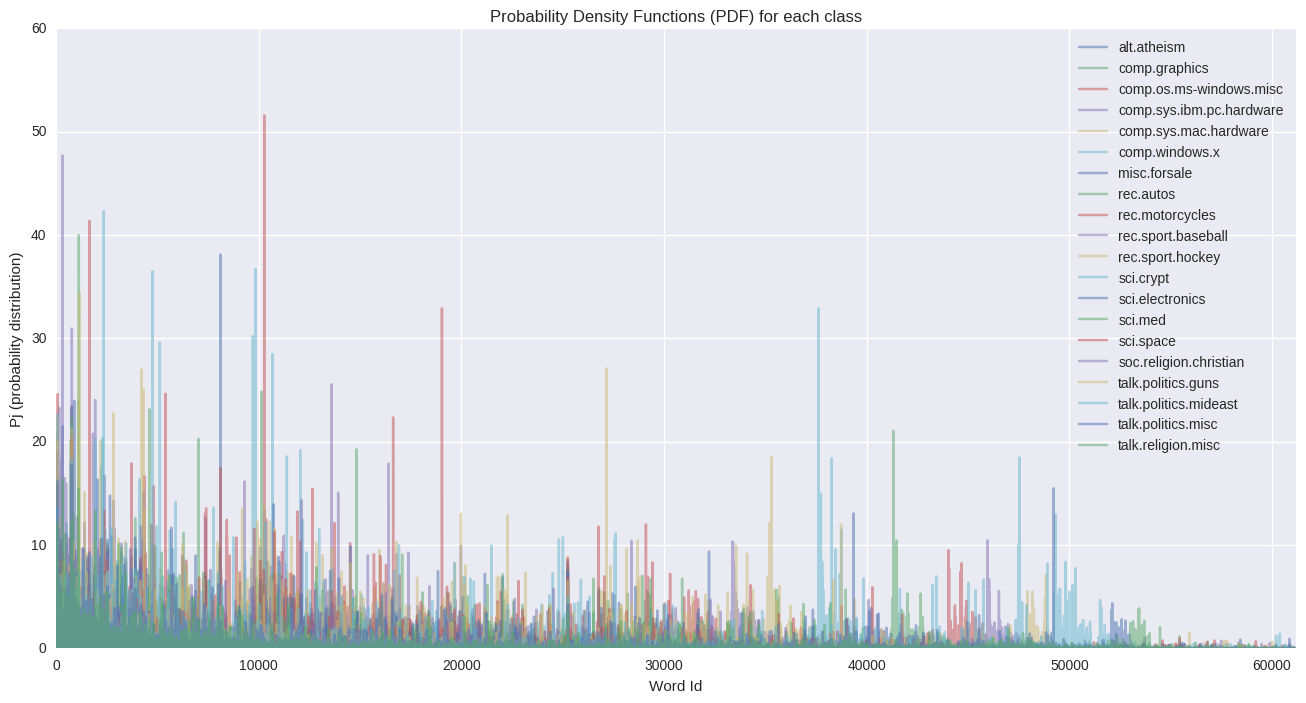

In [14]:
PDF = clf.feature_count_
PDF = pd.DataFrame(PDF, index = test.target_names).transpose()
PDF.plot(figsize=(16, 8), title= 'Probability Density Functions (PDF) for each class', alpha=0.5)
plt.xlabel('Word Id')
plt.ylabel('Pj (probability distribution)')

### To show the unweighted Pjs (document size does not matter), the Pjs in the prior dataframe were divided by the sum of the document

In [15]:
sums = list(Pj.sum(axis=1))
unweighted_Pj = pd.DataFrame()
for i in range(len(Pj.index)):
    unweighted_Pj[categories[i]] = (Pj.loc[categories[i]] / sums[i] * 100)
unweighted_Pj = unweighted_Pj.transpose()
unweighted_Pj

,archive,name,atheism,resources,alt,last,modified,december,version,atheist,...,devoutly,smugly,tartaros,bibical,tophet,aeroplane,gosple,ephas,kltensme,etrbom
alt.atheism,0.004421,0.0,0.339417,0.010624,0.094871,0.0,0.002917,0.000519,0.053771,0.153849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.graphics,0.014634,0.0,0.000000,0.008810,0.024479,0.0,0.003473,0.007741,0.192801,0.006988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.os.ms-windows.misc,0.019930,0.0,0.000000,0.032008,0.036959,0.0,0.004531,0.002672,0.204207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.sys.ibm.pc.hardware,0.014329,0.0,0.000000,0.000000,0.018651,0.0,0.001523,0.002923,0.105447,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.sys.mac.hardware,0.011427,0.0,0.000000,0.000971,0.002679,0.0,0.000141,0.000000,0.070520,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
comp.windows.x,0.009373,0.0,0.000000,0.032343,0.005108,0.0,0.005338,0.001997,0.162815,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
misc.forsale,0.000000,0.0,0.000000,0.002973,0.003216,0.0,0.000000,0.000000,0.059119,0.010807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.autos,0.012207,0.0,0.000000,0.000000,0.009746,0.0,0.010496,0.005953,0.039486,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.motorcycles,0.006975,0.0,0.000000,0.001849,0.004612,0.0,0.005896,0.001071,0.056484,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rec.sport.baseball,0.000964,0.0,0.000000,0.002488,0.001676,0.0,0.000515,0.000000,0.020626,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The unweighted Pjs sum to 100% as shown.

In [16]:
unweighted_Pj.sum(axis=1)

alt.atheism                 100.0
comp.graphics               100.0
comp.os.ms-windows.misc     100.0
comp.sys.ibm.pc.hardware    100.0
comp.sys.mac.hardware       100.0
comp.windows.x              100.0
misc.forsale                100.0
rec.autos                   100.0
rec.motorcycles             100.0
rec.sport.baseball          100.0
rec.sport.hockey            100.0
sci.crypt                   100.0
sci.electronics             100.0
sci.med                     100.0
sci.space                   100.0
soc.religion.christian      100.0
talk.politics.guns          100.0
talk.politics.mideast       100.0
talk.politics.misc          100.0
talk.religion.misc          100.0
dtype: float64

## Part (d)
Write a routine that uses this naive Bayes model to classify a new document. To avoid underflow,

work with logs rather than multiplying together probabilities.

### The below function takes in an index from the test dataset and outputs both the probabilites and predicted class of the speciaific document based on the model built above.

In [17]:
def routine_MNNB(doc_id):
    doc_num = reverse_test_map[doc_id]
    doc_name = str(test_map[doc_num])
    print doc_name
    probs = clf.predict_proba(X_test_tfidf[doc_num])
    predicted = clf.predict(X_test_tfidf[doc_num])
    print 'The document has the following probabilities: \n', probs
    print 'The document belongs to class', predicted
        
routine_MNNB('./20news-bydate-test/alt.atheism/53588')

./20news-bydate-test/alt.atheism/53588
The document has the following probabilities: 
[[ 0.08661778  0.01279424  0.01275233  0.01414636  0.01509602  0.01324896
   0.01403733  0.0198487   0.01771988  0.01801373  0.01902463  0.02007612
   0.01486753  0.48812311  0.01800567  0.12770046  0.02621483  0.02299972
   0.01353205  0.02518056]]
The document belongs to class [13]


## Part (e)
Evaluate the performance of your model on the test data. What error rate do you achieve?

### Determine accuracy and error rate of the model built.

In [18]:
print 'The model is', metrics.accuracy_score(test.target, predicted), 'accurate'
print 'The model has an error rate of', 1- metrics.accuracy_score(test.target, predicted)

The model is 0.814790228359 accurate
The model has an error rate of 0.185209771641


### The probabilties for each document (column names) for each class (indexes). The highest probability is responsible for classifying the document.

In [19]:
probs = pd.DataFrame(clf.predict_proba(X_test_tfidf)).transpose()
probs

,0,1,2,3,4,5,6,7,8,9,...,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531
0,0.012016,0.000697,0.040364,0.048502,0.016563,0.008660,0.021002,0.016146,0.032993,0.004451,...,0.042989,0.009260,0.021842,0.031171,0.033404,0.022153,0.014970,0.009399,0.001004,0.059129
1,0.010501,0.000144,0.052787,0.041783,0.036831,0.007727,0.080058,0.014608,0.094807,0.531974,...,0.021280,0.015712,0.097718,0.032290,0.059075,0.055597,0.020489,0.072446,0.064700,0.041652
2,0.015304,0.000184,0.057389,0.030967,0.134796,0.008727,0.140611,0.021782,0.069995,0.051737,...,0.021714,0.020288,0.129861,0.028770,0.060408,0.046019,0.043261,0.078378,0.024762,0.022959
3,0.020311,0.000320,0.067330,0.030204,0.034723,0.009310,0.082893,0.035045,0.070717,0.048535,...,0.017367,0.020839,0.075077,0.042416,0.043715,0.060346,0.025226,0.141157,0.733120,0.042457
4,0.015585,0.000315,0.042628,0.035085,0.042262,0.006735,0.070801,0.032778,0.077187,0.038029,...,0.019747,0.025162,0.042381,0.033339,0.038976,0.058876,0.031477,0.114525,0.065390,0.033632
5,0.009969,0.000146,0.050810,0.039719,0.383545,0.005851,0.085448,0.028920,0.138771,0.069722,...,0.017610,0.020407,0.055842,0.028867,0.036273,0.041682,0.020561,0.045213,0.007712,0.020365
6,0.016833,0.000218,0.055846,0.019530,0.022498,0.010897,0.049353,0.027822,0.042125,0.043052,...,0.019714,0.015716,0.051452,0.034475,0.045226,0.044620,0.014534,0.035864,0.063221,0.044200
7,0.030334,0.001774,0.052650,0.032392,0.038522,0.655028,0.041849,0.456061,0.036301,0.012181,...,0.024994,0.020509,0.044238,0.047377,0.078762,0.046220,0.041550,0.053143,0.003618,0.273277
8,0.018007,0.000776,0.039831,0.067301,0.033628,0.016052,0.051179,0.092261,0.033515,0.011801,...,0.020605,0.026474,0.060038,0.047579,0.055395,0.072080,0.523115,0.048837,0.002018,0.051387
9,0.114014,0.000590,0.060476,0.025999,0.031572,0.015218,0.026879,0.031222,0.034767,0.011575,...,0.018612,0.012011,0.059994,0.050651,0.060257,0.032140,0.025864,0.024487,0.001871,0.039269


### The model was able to predict the majority of the classes, but was not able to predict the majority of class 15, as shown by the confusion matrix (the main diagnonal should have the largest numbers for the highest rates of true positives)

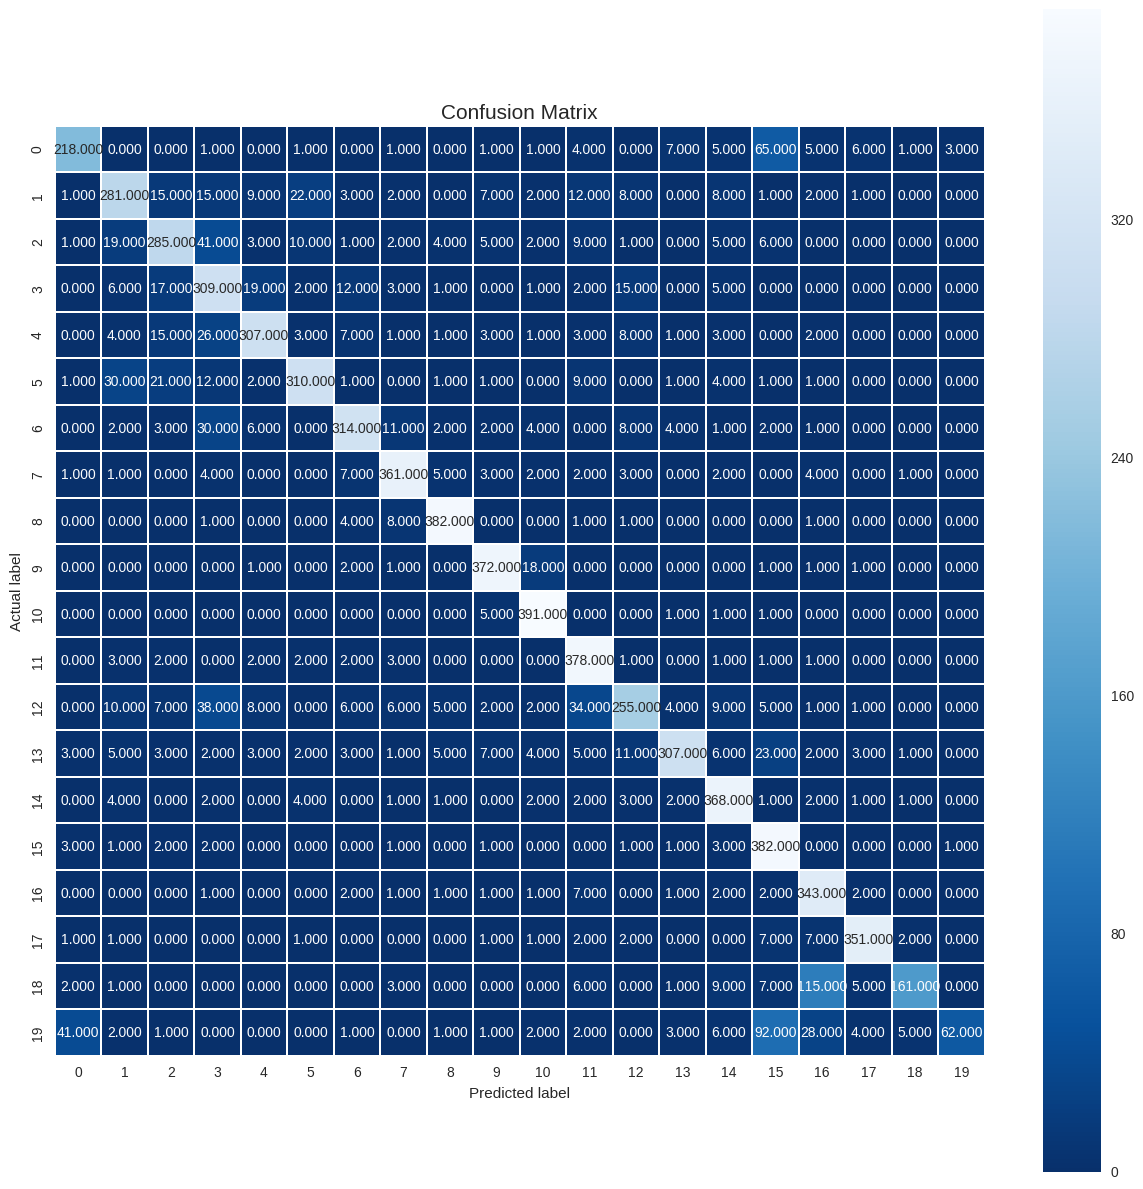

In [20]:
cm = pd.DataFrame(metrics.confusion_matrix(test.target, predicted))
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

### Furthermore, the classification report confirms the findings of the confusion matrix, showing that class 15 has the lowest precision at 0.64 when compared to the other classes.

In [21]:
print metrics.classification_report(test.target, predicted)

             precision    recall  f1-score   support

          0       0.80      0.68      0.74       319
          1       0.76      0.72      0.74       389
          2       0.77      0.72      0.75       394
          3       0.64      0.79      0.71       392
          4       0.85      0.80      0.82       385
          5       0.87      0.78      0.82       395
          6       0.86      0.81      0.83       390
          7       0.89      0.91      0.90       396
          8       0.93      0.96      0.95       398
          9       0.90      0.94      0.92       397
         10       0.90      0.98      0.94       399
         11       0.79      0.95      0.86       396
         12       0.80      0.65      0.72       393
         13       0.92      0.78      0.84       396
         14       0.84      0.93      0.88       394
         15       0.64      0.96      0.77       398
         16       0.66      0.94      0.78       364
         17       0.94      0.93      0.93   

In [22]:
PDF.columns

Index([u'alt.atheism', u'comp.graphics', u'comp.os.ms-windows.misc',
       u'comp.sys.ibm.pc.hardware', u'comp.sys.mac.hardware',
       u'comp.windows.x', u'misc.forsale', u'rec.autos', u'rec.motorcycles',
       u'rec.sport.baseball', u'rec.sport.hockey', u'sci.crypt',
       u'sci.electronics', u'sci.med', u'sci.space', u'soc.religion.christian',
       u'talk.politics.guns', u'talk.politics.mideast', u'talk.politics.misc',
       u'talk.religion.misc'],
      dtype='object')

### See the similarities between class 15 and 19, this can describe the low precision rate of class 15.

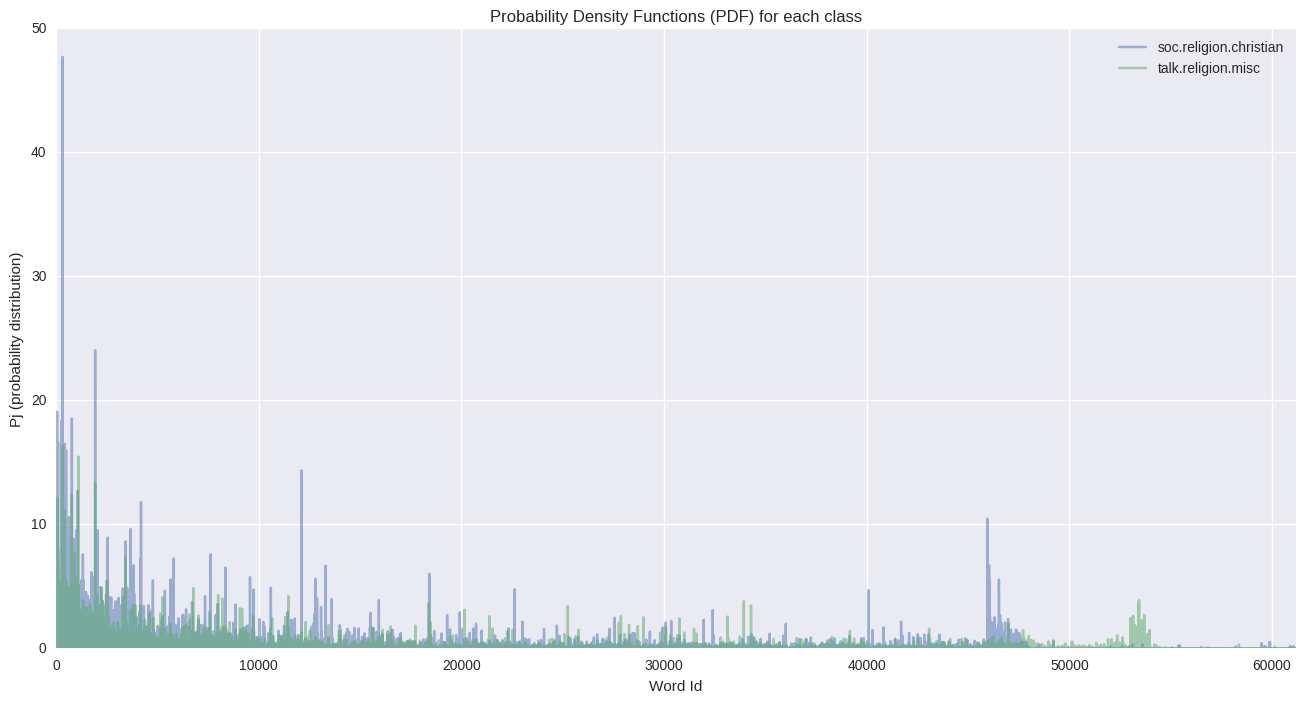

In [23]:
A = PDF[['soc.religion.christian', 'talk.religion.misc']]
A.plot(figsize=(16, 8), title= 'Probability Density Functions (PDF) for each class', alpha=0.5)
plt.xlabel('Word Id')
plt.ylabel('Pj (probability distribution)')

## Part (f)
If you have the time and inclination: see if you can get a better-performing model.

• Split the training data into a smaller training set and a validation set. The split could be

80-20, for instance. You’ll use this training set to estimate parameters and the validation set

to decide between different options.

• Think of 2-3 ways in which you might improve your earlier model. Examples include: (i)

replacing the frequency f of a word in a document by log(1 + f), (ii) removing stopwords;

(iii) reducing the size of the vocabulary; etc. Estimate a revised model for each of these, and

use the validation set to choose between them.

• Evaluate your final model on the test data. What error rate do you achieve?

### To Do at a later time

# Miscellaneous approaches/work
### Can ignore for grading purposes

### Calculating the prior probabilities: The number of documents belonging to class (c_i) / the total number of documents.

In [24]:
# class_counts = !find . -maxdepth 2 -mindepth 2 -type f -printf "%h\0" | uniq -zc | tr '\0' '\n'
# total_count = !find . -type f | wc -l

# length = len(class_counts) -1
# prob_c = []

# for i in range(length):
#     i = int(filter(str.isdigit, class_counts[i]))
#     freq = i/float(total_count[0])
#     prob_c.append(freq)
# prob_c

In [25]:
# !pwd

In [26]:
# !mkdir concat_docs
# # import os
# # os.listdir('./')
# !cat ./alt.atheism/* > ./concat_docs/alt.atheism.txt
# !cat ./rec.sport.hockey/* > ./concat_docs/rec.sport.hockey.txt
# !cat ./rec.sport.baseball/* > ./concat_docs/rec.sport.baseball.txt
# !cat ./comp.sys.ibm.pc.hardware/* > ./concat_docs/comp.sys.ibm.pc.hardware.txt
# !cat ./rec.autos/* > ./concat_docs/rec.autos.txt
# !cat ./comp.graphics/* > ./concat_docs/comp.graphics.txt
# !cat ./comp.os.ms-windows.misc/* > ./concat_docs/comp.os.ms-windows.misc.txt
# !cat ./sci.med/* > ./concat_docs/sci.med.txt
# !cat ./talk.politics.misc/* > ./concat_docs/talk.politics.misc.txt
# !cat ./sci.electronics/* > ./concat_docs/sci.electronics.txt
# !cat ./misc.forsale/* > ./concat_docs/misc.forsale.txt
# !cat ./talk.religion.misc/* > ./concat_docs/talk.religion.misc.txt
# !cat ./comp.windows.x/* > ./concat_docs/comp.windows.x.txt
# !cat ./soc.religion.christian/* > ./concat_docs/soc.religion.christian.txt
# !cat ./comp.sys.mac.hardware/* > ./concat_docs/comp.sys.mac.hardware.txt
# !cat ./sci.space/* > ./concat_docs/sci.space.txt
# !cat ./rec.motorcycles/* > ./concat_docs/rec.motorcycles.txt
# !cat ./talk.politics.mideast/* > ./concat_docs/talk.politics.mideast.txt
# !cat ./talk.politics.guns/* > ./concat_docs/talk.politics.guns.txt
# !cat ./sci.crypt/* > ./concat_docs/sci.crypt.txt

In [27]:
#%cd concat_docs/
# import itertools
# A = !ls
# classes = []
# for a in A:
#     class_i = !cat $a
#     class_i = ' '.join(itertools.chain(class_i))
#     classes.append(class_i)

In [28]:
# from string import punctuation
# classes_np = []
# for text in classes:
#     for char in list(punctuation):
#         text = text.replace(char, ' ')
#     classes_np.append(text)

# classes_editted = []
# for text in classes_np:
#     for char in '\t':
#         text = text.replace(char, ' ')
#     classes_editted.append(text)

# classes_nd = []
# for text in classes_editted:
#     text = ''.join([i for i in text if not i.isdigit()])
#     classes_nd.append(text)

In [29]:
# import nltk
# nltk.download()

In [30]:
# words = []
# for i in classes_nd:
#     word_list = i.split(' ')
#     word_list = [w.lower() for w in word_list if w != '']
#     words.append(word_list)
#     print len(word_list)
    
# from nltk.corpus import stopwords
# words_filtered = []
# for w in words:
#     filtered = [word for word in w if word not in stopwords.words('english')]
#     words_filtered.append(filtered)

In [31]:
# import operator

# def freq_counter(List):
#     Dict = {}
#     for w in List:
#         if w in Dict.keys():
#             Dict[w]+=1
#         else:
#             Dict[w]=1
#     return Dict.items()

# list_len = len(words_filtered)
# counts = []
# for i in range(list_len):
#     print i 
#     counting = freq_counter(words_filtered[i])
#     counts.append(counting)

In [32]:
# !pwd

In [33]:
# counts_1 = pd.DataFrame(counts[0], columns = ['none', '1'])
# counts_1.shape

## Easy method

In [34]:
# vocab = pd.read_csv('./vocabulary.txt', names = ['words'])
# vocab['wordIdx'] = vocab.index
# print 'Vocab shape is', vocab.shape
# vocab.head()

In [35]:
# train_x = pd.read_csv('./20news-bydate/matlab/train.data', sep = ' ', names=['docIdx', 'wordIdx', 'count'])
# train_y = pd.read_csv('./20news-bydate/matlab/train.label', names = ['class'])
# test_x = pd.read_csv('./20news-bydate/matlab/test.data', sep = ' ', names=['docIdx', 'wordIdx', 'count'])
# test_y = pd.read_csv('./20news-bydate/matlab/test.label', names = ['class'])

# train_x = pd.merge(vocab, train_x, how = 'left')
# train_x = train_x.fillna(value=0)
# del train_x['words']
# print 'train_x shape is', train_x.shape
# test_x = pd.merge(vocab, test_x, how = 'left')
# test_x = test_x.fillna(value=0)
# del test_x['words']
# print 'test_x shape is', test_x.shape

In [36]:
# from scipy.sparse import *
# from scipy import *
# row = np.array(train_x['wordIdx'])
# col = np.array(train_x['docIdx'])
# data = np.array(train_x['count'])
# csr_matrix( (data, (row, col)), shape=(53975, 11269)).todense()